# FASHION CLASS CLASSIFICATION 
# Youssef JEBROUN

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

# STEP #2: IMPORTING DATA


In [1]:
# import libraries 
# Import Pandas for data manipulation using dataframes
import pandas as pd
# Import Numpy for data statistical analysis
import numpy as np
# Import matplotlib for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep =',') 
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep =',')

# STEP #3: VISUALIZATION OF THE DATASET  

In [3]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype='float32')

In [8]:
testing = np.array(fashion_test_df, dtype='float32')

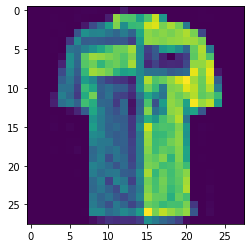

In [9]:
plt.imshow(training[140, 1:].reshape(28,28))

4.0

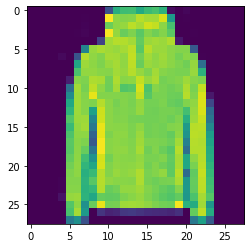

In [10]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label

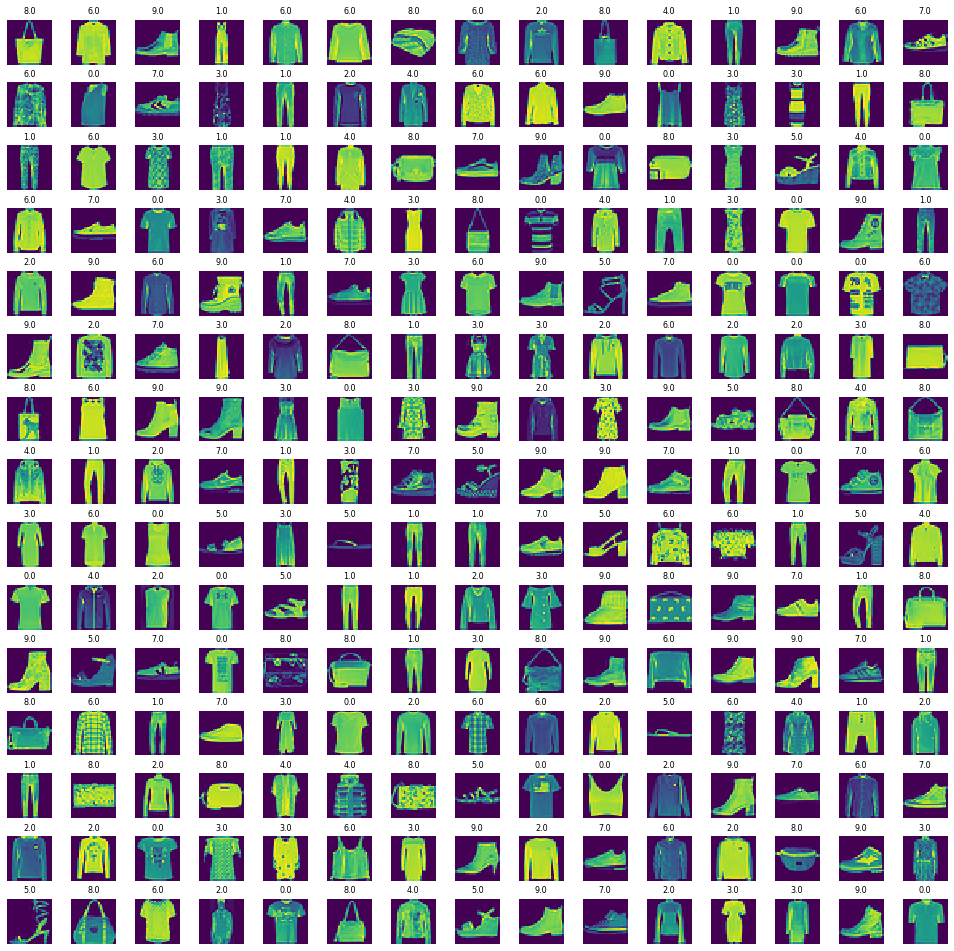

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# STEP #4: TRAINING THE MODEL

In [12]:
# Prepare the training and testing dataset 
X_train = training[:, 1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state=12345)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [16]:
# Import train_test_split from scikit library
# Import Keras
# open source Neural network library madke our life much easier
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))

In [18]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
cnn_model.add(Flatten())

In [20]:
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [21]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [22]:
epochs = 50

history = cnn_model.fit(X_train, 
                        y_train, batch_size = 512, epochs = 60, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/60
94/94 [==============================] - 2s 17ms/step - loss: 1.4930 - accuracy: 0.5455 - val_loss: 0.8084 - val_accuracy: 0.7145
Epoch 2/60
94/94 [==============================] - 1s 12ms/step - loss: 0.7147 - accuracy: 0.7427 - val_loss: 0.6494 - val_accuracy: 0.7629
Epoch 3/60
94/94 [==============================] - 1s 13ms/step - loss: 0.6198 - accuracy: 0.7738 - val_loss: 0.5901 - val_accuracy: 0.7828
Epoch 4/60
94/94 [==============================] - 1s 12ms/step - loss: 0.5697 - accuracy: 0.7921 - val_loss: 0.5567 - val_accuracy: 0.7997
Epoch 5/60
94/94 [==============================] - 1s 12ms/step - loss: 0.5375 - accuracy: 0.8049 - val_loss: 0.5242 - val_accuracy: 0.8132
Epoch 6/60
94/94 [==============================] - 1s 14ms/step - loss: 0.5123 - accuracy: 0.8141 - val_loss: 0.5024 - val_accuracy: 0.8185
Epoch 7/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4918 - accuracy: 0.8224 - val_loss: 0.4891 - val_accuracy: 0.8253
Epoch 8/60
94

Epoch 59/60
94/94 [==============================] - 1s 16ms/step - loss: 0.3396 - accuracy: 0.8775 - val_loss: 0.3691 - val_accuracy: 0.8645
Epoch 60/60
94/94 [==============================] - 1s 14ms/step - loss: 0.3394 - accuracy: 0.8766 - val_loss: 0.3714 - val_accuracy: 0.8634


# STEP #5: EVALUATING THE MODEL

In [23]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8679
Test Accuracy : 0.868


In [24]:
predicted_classes = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


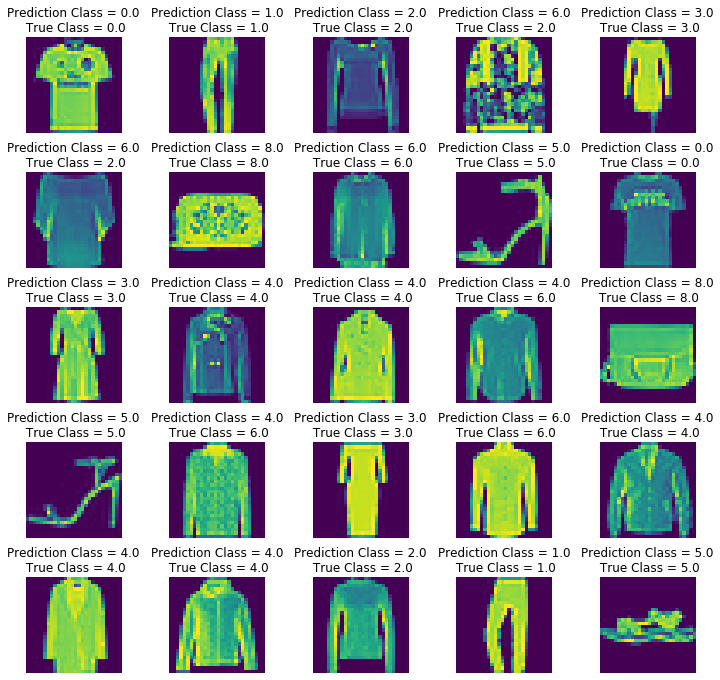

In [25]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

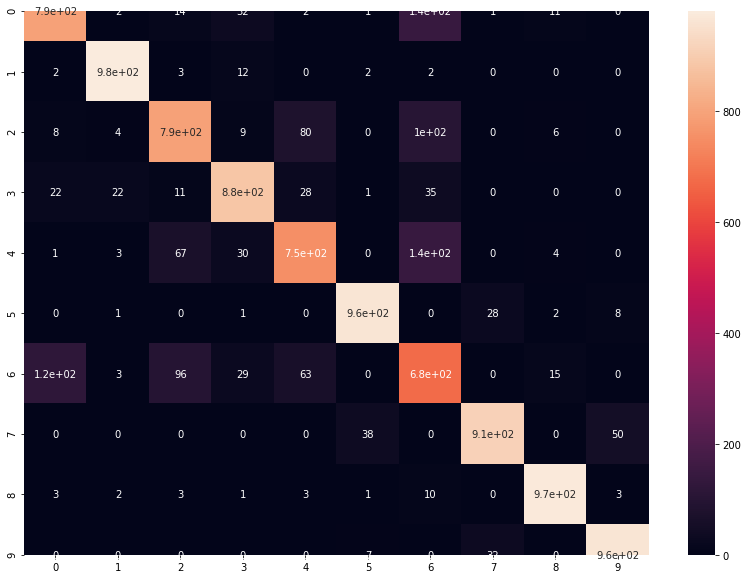

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element t

In [27]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.79      0.81      1000
     Class 1       0.96      0.98      0.97      1000
     Class 2       0.80      0.79      0.80      1000
     Class 3       0.89      0.88      0.88      1000
     Class 4       0.81      0.75      0.78      1000
     Class 5       0.95      0.96      0.96      1000
     Class 6       0.61      0.68      0.64      1000
     Class 7       0.94      0.91      0.92      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [28]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        